In [ ]:
%pip install -qr requirements.txt # install

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
import torch
import utils
display = utils.notebook_init()  # checks

# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

# 3. Train

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

# Train Pretrained

In [21]:
!python train.py --data coco128.yaml --weights 'yolov5s.pt' --cfg models/yolov5s.yaml --img 416 --epochs 3

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, classes=80, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-252-g52d82bf Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

YOLOv5s summary: 214 layers, 7235389 parameters, 7235389 gradients, 16.6 GFLOPs

Fusing layers... 
YOLOv5s summary: 157 layers, 7225885 parameters, 7225885 gradients, 16.4 GFLOPs
                 Class     Images  Instances          P          R      mAP50   
                   all        128        929      0.533      0.587      0.606      0.379
                     0        128        254       0.56      0.586      0.528      0.305
                     1        128          6      0.617      0.283      0.293      0.238
                     2        128         46      0.555       0.19      0.184      0.097
                     3        128          5      0.769          1      0.995      0.582
                     4        128          6      0.761      0.833      0.955      0.663
                     5        128          7      0.541      0.714      0.729      0.585
                     6        128          3      0.755      0.667      0.863      0.587
                     7      

# Train QuantModel, not pretrained

In [7]:
!python train.py --data coco128.yaml --weights '' --cfg models/yolov5s_quant.yaml --img 416 --epochs 3 --classes 80

train: weights=, cfg=models/yolov5s_quant.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, classes=80, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-252-g52d82bf Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma

YOLOv5s_quant summary: 521 layers, 7235390 parameters, 7235389 gradients, 11.0 GFLOPs

Fusing layers... 
YOLOv5s_quant summary: 473 layers, 7227646 parameters, 7227646 gradients, 10.9 GFLOPs
                 Class     Images  Instances          P          R      mAP50   
                   all        128        929          0          0          0          0
Results saved to runs/train/exp170


In [ ]:
ckpt = {}
ckpt['model'] = model.state_dict()
torch.save(ckpt,"experiment_models/yolov5s.pt")

# Train Quantized (QAT)

In [16]:
# please do not forget to add the --cfg for quant models so the code does not break
!python train.py --img 416 --batch 16 --epochs 3 --data coco128.yaml --cfg models/yolov5s_quant.yaml --weights experiment_models/yolov5s_quant.pt 

train: weights=experiment_models/yolov5s_quant.pt, cfg=models/yolov5s_quant.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, classes=80, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-252-g52d82bf Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0,

# Train PostQuantization (PTQ)

In [17]:
# please do not forget to add the --cfg for quant models so the code does not break
!python train.py --img 416 --batch 16 --epochs 9 --data coco128.yaml --cfg models/yolov5s_quant.yaml --weights yolov5s.pt --device 0

train: weights=yolov5s.pt, cfg=models/yolov5s_quant.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=9, classes=80, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-252-g52d82bf Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.

        7/8      2.12G    0.04891    0.05129    0.01711        226        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        128        929     0.0102     0.0223     0.0152    0.00562

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
        8/8      2.12G    0.04703    0.05129    0.01813        311        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        128        929     0.0102     0.0223     0.0152    0.00562

9 epochs completed in 0.007 hours.
Optimizer stripped from runs/train/exp174/weights/last.pt, 14.7MB
Optimizer stripped from runs/train/exp174/weights/best.pt, 14.7MB

Validating runs/train/exp174/weights/best.pt...

                 from  n    params  module                                  arguments                     
  0                -1  1      3521  models.common.QuantConv                 [3, 32, 6, 2, 2]  

Results saved to runs/train/exp174


# Inference Pretrained Model

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model_pre = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s.yaml",
                       force_reload=True
                      )

im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model_pre(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

In [ ]:
for key,value in model_pre.state_dict().items():
    print(key,value)

# Inference Quantized Model (QAT)

In [40]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model_p = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s_pre.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s.yaml",
                       force_reload=True
                      )

model_q = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s_quant_pre.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s_quant.yaml",
                       force_reload=True
                      )

im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model_q(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

YOLOv5 🚀 v7.0-252-g52d82bf Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  mod

Exception: invalid syntax (<string>, line 1). Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

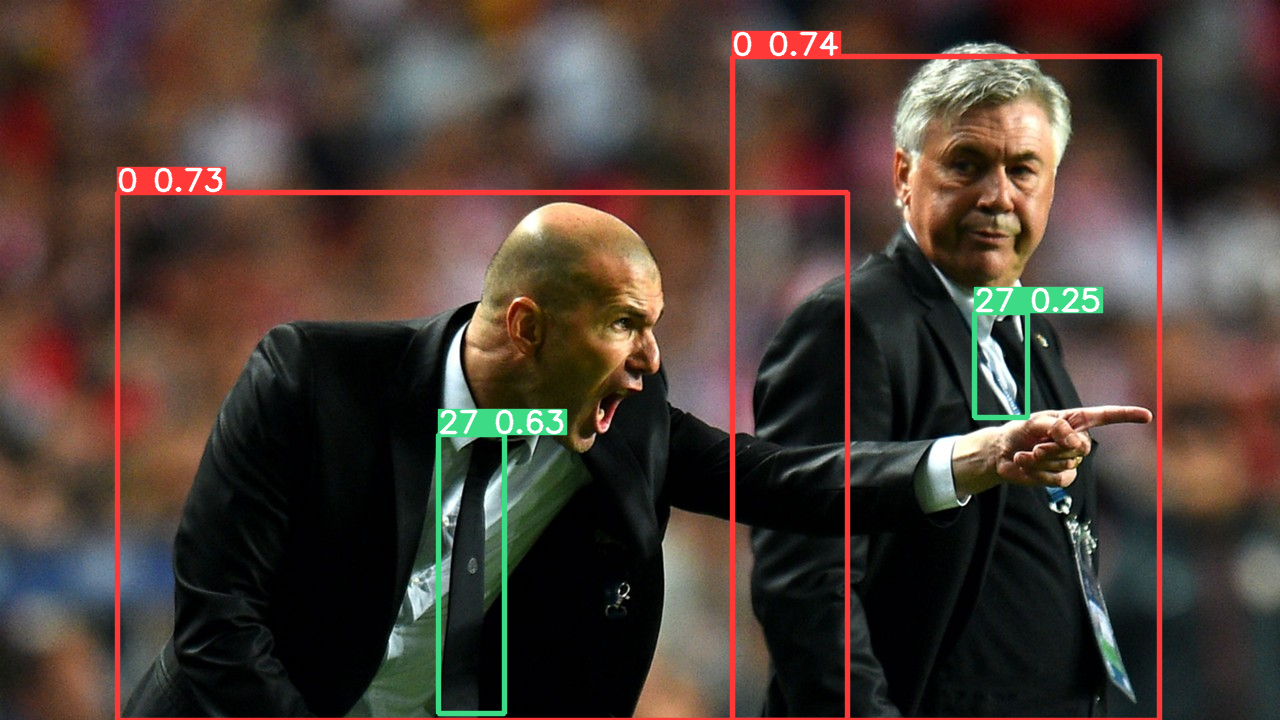

In [26]:
results.show()

# Inference Quantized Model (PTQ)

In [16]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s_quant_pre.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s_quant.yaml",
                       force_reload=True
                      )

im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

YOLOv5 🚀 v7.0-252-g52d82bf Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3521  models.common.QuantConv                 [3, 32, 6, 2, 2]              
  1                -1  1     18561  models.common.QuantConv                 [32, 64, 3, 2, None]          
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73985  models.common.QuantConv                 [64, 128, 3, 2, None]         
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295425  models.common.QuantConv                 [128, 256, 3, 2, None]        
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180673  mod

In [ ]:
df = results.pandas()
df.xyxy

# Copying weights for PTQ

In [9]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model_quant = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s_quant.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s_quant.yaml",
                       force_reload=False
                      )

model = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s_pre.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s.yaml",
                       force_reload=False
                      )


YOLOv5 🚀 v7.0-252-g52d82bf Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3521  models.common.QuantConv                 [3, 32, 6, 2, 2]              
  1                -1  1     18561  models.common.QuantConv                 [32, 64, 3, 2, None]          
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73985  models.common.QuantConv                 [64, 128, 3, 2, None]         
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295425  models.common.QuantConv                 [128, 256, 3, 2, None]        
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180673  mod

In [15]:
model_quant(im)

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 720x1280 (no detections)
Speed: 924.8ms pre-process, 20.8ms inference, 0.4ms NMS per image at shape (1, 3, 384, 640)

In [ ]:
model.model.model.model[0].conv.weight.data

In [14]:
model_quant_state = model_quant.state_dict()
model_state = model.state_dict()

for key,value in model_quant_state.items():
    if key in model_state:
        #pass
        #print(key)
        model_quant_state[key] = value
    else:
        print("NotFound",key)
        
#model_quant.load_state_dict(model_quant_state)

NotFound model.model.model.0.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value
NotFound model.model.model.1.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value
NotFound model.model.model.3.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value
NotFound model.model.model.5.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value
NotFound model.model.model.7.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value
NotFound model.model.model.10.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value
NotFound model.model.model.14.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value
NotFound model.model.model.18.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value
NotFound model.model.model.21.act.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value


In [4]:
for key,value in model_state.items():
    print(key)

model.model.model.0.conv.weight
model.model.model.0.conv.bias
model.model.model.1.conv.weight
model.model.model.1.conv.bias
model.model.model.2.cv1.conv.weight
model.model.model.2.cv1.conv.bias
model.model.model.2.cv2.conv.weight
model.model.model.2.cv2.conv.bias
model.model.model.2.cv3.conv.weight
model.model.model.2.cv3.conv.bias
model.model.model.2.m.0.cv1.conv.weight
model.model.model.2.m.0.cv1.conv.bias
model.model.model.2.m.0.cv2.conv.weight
model.model.model.2.m.0.cv2.conv.bias
model.model.model.3.conv.weight
model.model.model.3.conv.bias
model.model.model.4.cv1.conv.weight
model.model.model.4.cv1.conv.bias
model.model.model.4.cv2.conv.weight
model.model.model.4.cv2.conv.bias
model.model.model.4.cv3.conv.weight
model.model.model.4.cv3.conv.bias
model.model.model.4.m.0.cv1.conv.weight
model.model.model.4.m.0.cv1.conv.bias
model.model.model.4.m.0.cv2.conv.weight
model.model.model.4.m.0.cv2.conv.bias
model.model.model.4.m.1.cv1.conv.weight
model.model.model.4.m.1.cv1.conv.bias
mode

In [ ]:
results = model_quant(im)
results

In [ ]:
model_quant.model.model.model[0].conv.weight.data

In [13]:
model_quant.load_state_dict(model.state_dict())

ValueError: Cannot assign non-leaf Tensor to parameter 'parameter'. Model parameters must be created explicitly. To express 'parameter' as a function of another Tensor, compute the value in the forward() method.